In [1]:
import os
print(os.getcwd())
os.chdir('../../')
print(os.getcwd())

C:\Users\Mehran\Desktop\Desktop files\Bachelors Project\Project\RLAgent
C:\Users\Mehran\Desktop\Desktop files\Bachelors Project


In [2]:
import warnings
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from Project.RLAgent.Train import Train, load_data

from Project.DeepRLAgent.DataLoader import YahooFinanceDataLoader
from Project.DeepRLAgent.Data import Data

from Project.PatternDetectionInCandleStick.LabelPatterns import label_candles
from Project.PatternDetectionInCandleStick.Evaluation import Evaluation

PATH = r'C:\Users\Mehran\Desktop\Desktop files\Bachelors Project\Project\TestResults\Second\Figures\\'

In [3]:
num_iteration = 10000
gamma = 0.7
alpha = 0.3
epsilon = 0.1
n = 10

In [11]:
# BtC-USD
BTC_USD_PATH = r'C:\Users\Mehran\Desktop\Desktop files\Bachelors Project\Project\Data\BTC-USD\\'
BTC_USD_FILE = r'BTC-USD.csv'
data_loader = YahooFinanceDataLoader(BTC_USD_PATH, BTC_USD_FILE, True)
data_train = Data(data_loader.data, data_loader.patterns, None, gamma, n)

In [15]:
GOOGL_PATH = r'C:\Users\Mehran\Desktop\Desktop files\Bachelors Project\Project\Data\GOOGL\\'
GOOGL_FILE = 'GOOGL.csv'
data_loader = YahooFinanceDataLoader(GOOGL_PATH, GOOGL_FILE, True)
data_train = Data(data_loader.data, data_loader.patterns, None, gamma, n)

# data_train = Data(data_loader.data_train, data_loader.patterns, None, gamma, n)
# data_test = Data(data_loader.data_test, data_loader.patterns, None, gamma, n)

In [ ]:
# path = 'Data/XBTUSD-5m-data.csv'
# data, patterns = load_data(path)

In [16]:
deal = Train(data_train.data, data_loader.patterns, n=n, window_size=20, num_iteration=num_iteration, gamma=gamma, alpha=alpha, epsilon=epsilon)

In [17]:
deal.training()
deal.write_to_file()

100%|██████████████████████████████████████████████████████████████████████████| 10000/10000 [00:06<00:00, 1631.96it/s]


In [18]:
# deal.read_from_file(f"{num_iteration}-{n}-{gamma}-{alpha}-{epsilon}(2).pkl")
deal.make_investment()
ev_RuleBased = Evaluation(deal.data, 'action', 1000)
ev_agent = Evaluation(deal.data, 'action_agent', 1000)

print("RuleBased:")
ev_RuleBased.evaluate()
print('*' * 80)
print("Agent:")
ev_agent.evaluate()

agent_portfolio = ev_agent.get_daily_portfolio_value()
RuleBased_portfolio = ev_RuleBased.get_daily_portfolio_value()

RuleBased:
Historical VAR is -1.8999999999999986
Variance-Covariance VAR with 95% confidence is -1.3493637152204445
Variance-Covariance VAR with 99% confidence is -1.9054651251294763
##################################################
Arithmetic Return: 9.998370152478456
##################################################
Logarithmic Return: -8.298019941422252
##################################################
Average daily return: 0.019877475452243453
##################################################
Daily return variance (return type: Arithmetic): 0.6687906100839378
##################################################
Daily return variance (return type: Logarithmic): 0.6815033594526235
##################################################
Time weighted return: 0.004086497490524144
##################################################
Total Return: 1.0865202945969534
##################################################
Sharp Ratio: 0.024306148243243328
###########################################

In [ ]:
# print(human_portfolio[-1])
# print(robot_portfolio[-1])
# print(ev_human.calculate_match_actions('action', 'action_robot'))

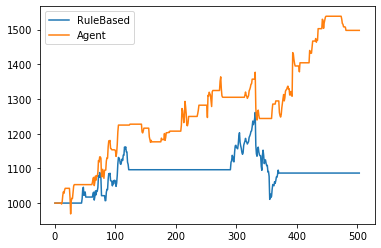

In [8]:

experiment_num = 1
import os
while os.path.exists(
        f'{PATH}{num_iteration}-{n}-{gamma}-{alpha}-{epsilon}({experiment_num}).jpg'):
    experiment_num += 1

plt.plot(np.arange(len(RuleBased_portfolio)), RuleBased_portfolio, label='RuleBased')
plt.plot(np.arange(len(agent_portfolio)), agent_portfolio, label='Agent')
plt.legend()
plt.savefig(f'{PATH}{num_iteration}-{n}-{gamma}-{alpha}-{epsilon}({experiment_num}).jpg')

In [ ]:
deal.agent.get_Qvalue_log()

In [ ]:
data_draw = data[1050:1200]

In [ ]:
import plotly.graph_objects as go

import pandas as pd
from datetime import datetime

for i in data_draw.index:
    data_draw['label'][i] = str(data_draw['label'][i])


fig = go.Figure(data=[go.Candlestick(x=data_draw.index,
                open=data_draw['open'],
                high=data_draw['high'],
                low=data_draw['low'],
                close=data_draw['close'], text=data_draw[['label', 'action', 'action_agent']].agg('-'.join, axis=1), name="Candle Stick")])
#                 go.Scatter(x=data.index, y=data.MA3, line=dict(color='orange', width=2), name="Moving Average")])
fig.show()

# fig = go.Figure(data=[go.Candlestick(x=data_draw.index,
#                 open=data_draw['open'],
#                 high=data_draw['high'],
#                 low=data_draw['low'],
#                 close=data_draw['close'], text=data_draw[['label', 'action']].agg('-'.join, axis=1), name="Candle Stick"), #])
#                 go.Scatter(x=data_draw.index, y=data_draw.MA5, line=dict(color='blue', width=2), name="Moving Average")])

# fig.show()

In [ ]:
import os

In [ ]:
os.path.exists(f'{PATH}{num_iteration}-{n}-{gamma}-{alpha}-{epsilon}({experiment_num}).jpg')